# business problem understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("LoanData.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Data understanding

##### Loan_ID: Unique identifier for each loan.
##### Gender: Gender of the applicant (Male/Female).
##### Married: Marital status of the applicant.
##### Dependents: Number of dependents the applicant has.
##### Education: Education level of the applicant.
##### Self_Employed: Indicates if the applicant is self-employed.
##### ApplicantIncome: Income of the primary applicant.
##### CoapplicantIncome: Income of the co-applicant, if any.
##### LoanAmount: Loan amount requested, in thousands.
##### Loan_Amount_Term: Loan term or duration, in months.
##### Credit_History: Whether the applicant's credit history meets the lending criteria.
##### Property_Area: Location type of the property (Urban/Semi-Urban/Rural).
##### Loan_Status: Indicates if the loan was approved (target variable for prediction).

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
data['Loan_ID'].nunique()

614

drop unimportnat column as  per feature selection

In [6]:
data.drop(columns = 'Loan_ID',inplace=True)

In [7]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [8]:
data['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [9]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [10]:
data['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [11]:
data['Dependents'].unique()
#wrong data type due to '3+'

array(['0', '1', '2', '3+', nan], dtype=object)

In [12]:
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [13]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [14]:
data['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [15]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
data['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

#### Create new column as per requirement

In [17]:
data['Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

In [18]:
data.drop(columns=['ApplicantIncome' , 'CoapplicantIncome'] ,inplace = True )

In [19]:
data['Income'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Income, dtype: float64

In [20]:
data['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [21]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [22]:
data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [23]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [24]:
data['Credit_History'] = data['Credit_History'].replace({1:'good',0:'bad'})

In [25]:
data['Credit_History'].value_counts()

Credit_History
good    475
bad      89
Name: count, dtype: int64

In [26]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [27]:
data['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [28]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [29]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [30]:
continuous = ['Income' , 'LoanAmount']

discrete_count = ['Dependents' , 'Loan_Amount_Term']

discrete_categorical = ['Gender', 'Married', 'Education',
       'Self_Employed',  'Credit_History', 'Property_Area', 'Loan_Status']

In [31]:
data.dtypes

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History       object
Property_Area        object
Loan_Status          object
Income              float64
dtype: object

# Exploratory Data analysis

#### for continuous variable

In [32]:
data[continuous].describe()

,Income,LoanAmount
count,614.000000,592.000000
mean,7024.705081,146.412162
std,6458.663872,85.587325
min,1442.000000,9.000000
25%,4166.000000,100.000000
50%,5416.500000,128.000000
75%,7521.750000,168.000000
max,81000.000000,700.000000


Text(0.5, 0.98, 'Univariate analysis on numerical column')

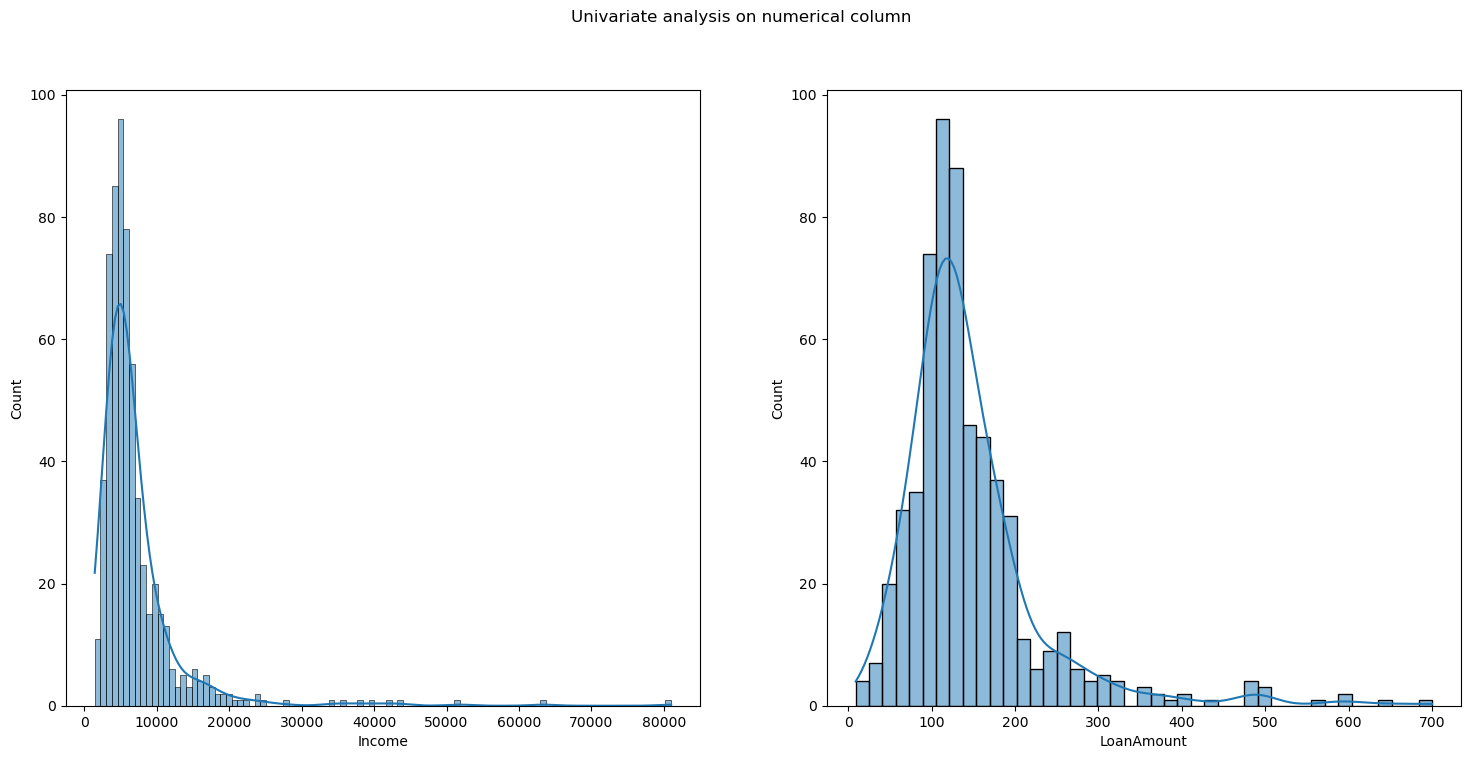

In [33]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(1,2, 1)
sns.histplot(data['Income'],kde = True)

plt.subplot(1,2, 2)
sns.histplot(data['LoanAmount'],kde = True)

plt.suptitle('Univariate analysis on numerical column')

In [34]:
data[continuous].skew()

Income        5.633449
LoanAmount    2.677552
dtype: float64

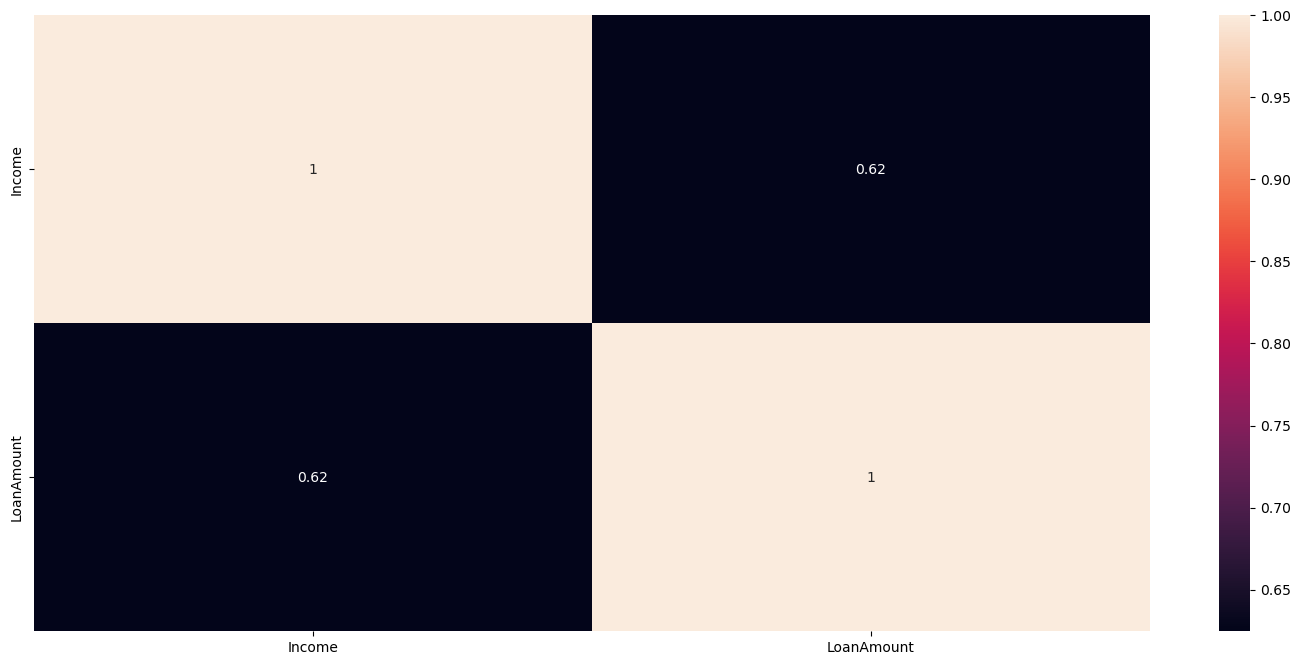

In [35]:
sns.heatmap(data[continuous].corr(),annot = True)
plt.show()
# more than 0.5 correlation causes colinearity problem

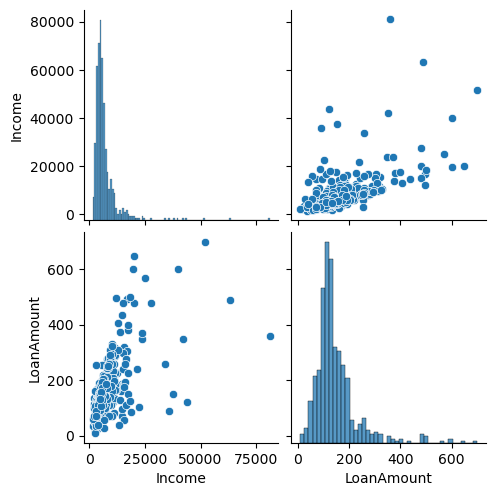

In [36]:
sns.pairplot(data[continuous])
plt.show()

##### for discrete variable

In [37]:
# credit history is float but we neeed it as object type for categorical
data['Credit_History'] = data['Credit_History'].astype(object) # convert to object
data[discrete_categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


Text(0.5, 0.98, 'Univariate analysis on categorcal Variable')

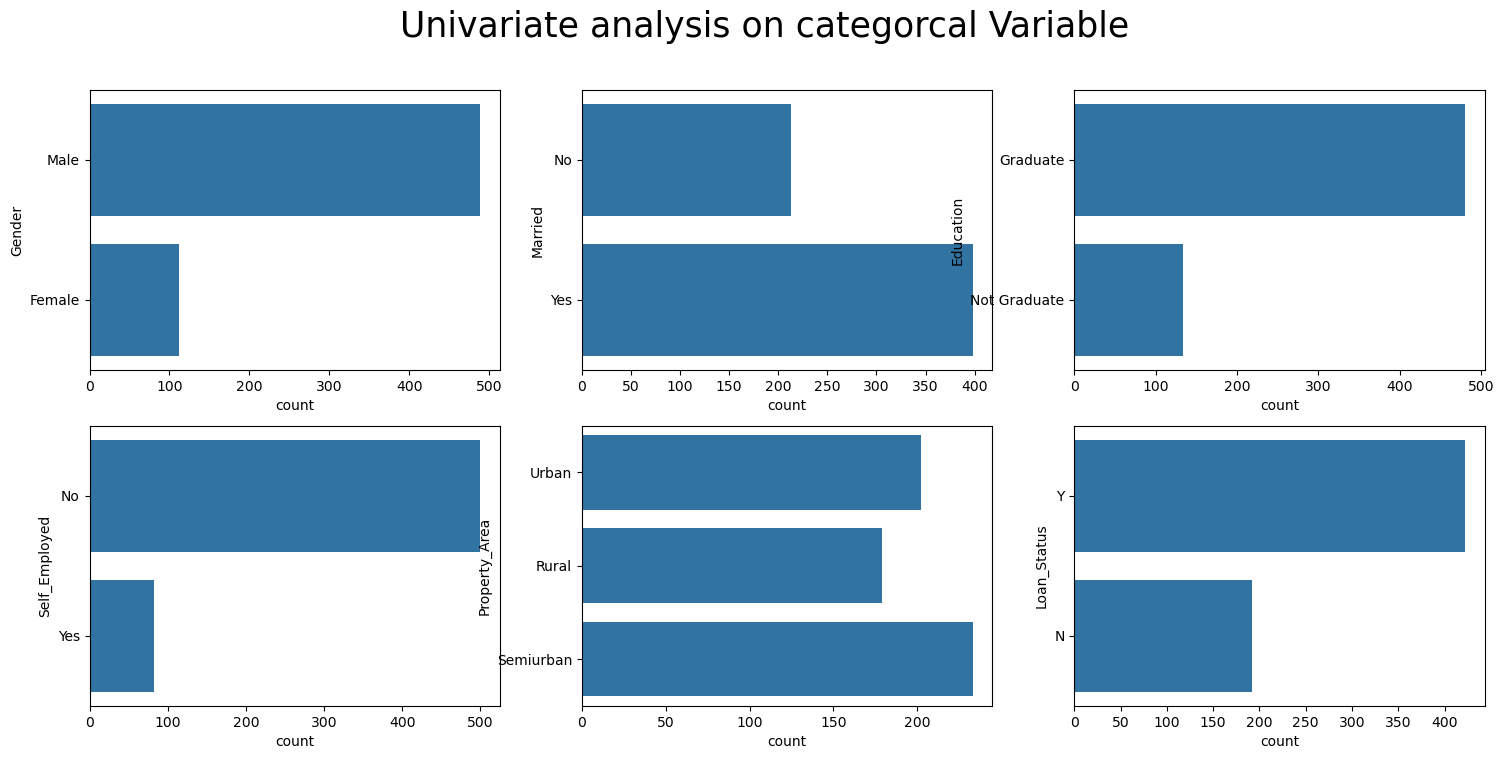

In [38]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(2,3,1)
sns.countplot(data['Gender'])

plt.subplot(2,3,2)
sns.countplot(data['Married'])

plt.subplot(2,3,3)
sns.countplot(data['Education'])

plt.subplot(2,3,4)
sns.countplot(data['Self_Employed'])

plt.subplot(2,3,5)
sns.countplot(data['Property_Area'])

plt.subplot(2,3,6)
sns.countplot(data['Loan_Status'])

plt.suptitle('Univariate analysis on categorcal Variable',fontsize = 25)

In [39]:
# compare all categories to loan_status to understand overall data

print('Impact of Gender on Loan status')
print(pd.crosstab(data['Loan_Status'],data['Gender']))
print('\n')

print('Impact of Marriage on Loan status')
print(pd.crosstab(data['Loan_Status'],data['Married']))
print('\n')

print('Impact of Education on Loan status')
print(pd.crosstab(data['Loan_Status'],data['Education']))
print('\n')

print('Impact of Self_Employed on Loan status')
print(pd.crosstab(data['Loan_Status'],data['Self_Employed']))
print('\n')

print('Impact of Property_Area on Loan status')
print(pd.crosstab(data['Loan_Status'],data['Property_Area']))
print('\n')

print('Impact of Dependents on Loan status')
print(pd.crosstab(data['Loan_Status'],data['Dependents']))
print('\n')

print('Impact of Credit_History on Loan status')
print(pd.crosstab(data['Loan_Status'],data['Credit_History']))
print('\n')

Impact of Gender on Loan status
Gender       Female  Male
Loan_Status              
N                37   150
Y                75   339


Impact of Marriage on Loan status
Married       No  Yes
Loan_Status          
N             79  113
Y            134  285


Impact of Education on Loan status
Education    Graduate  Not Graduate
Loan_Status                        
N                 140            52
Y                 340            82


Impact of Self_Employed on Loan status
Self_Employed   No  Yes
Loan_Status            
N              157   26
Y              343   56


Impact of Property_Area on Loan status
Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 69         54     69
Y                110        179    133


Impact of Dependents on Loan status
Dependents     0   1   2  3+
Loan_Status                 
N            107  36  25  18
Y            238  66  76  33


Impact of Credit_History on Loan status
Credit_History  bad  good
Loa

#### check for missing values

In [40]:
data.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

#### check for skewness

In [41]:
data[continuous].skew()

Income        5.633449
LoanAmount    2.677552
dtype: float64

#### check outliers

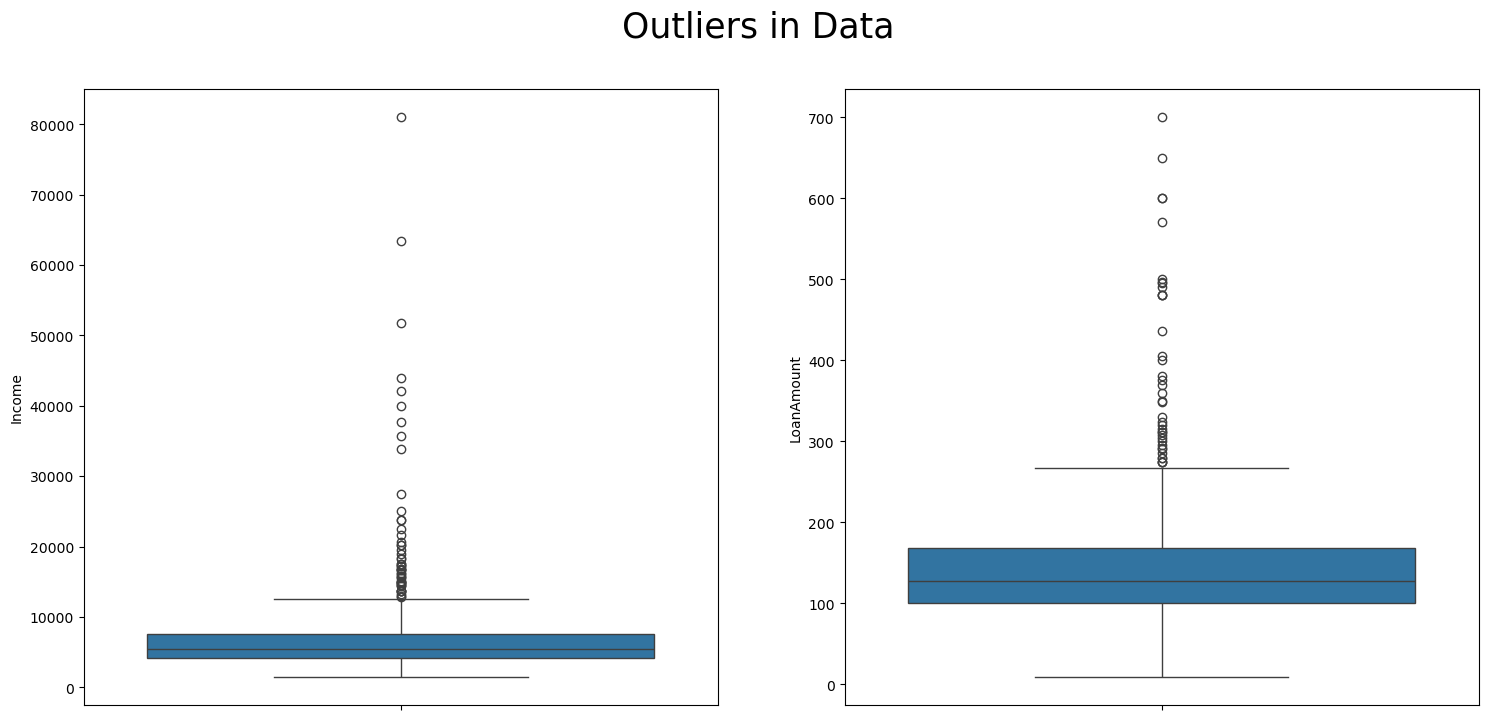

In [42]:
plt.subplot(1,2,1)
sns.boxplot(data['Income'])

plt.subplot(1,2,2)
sns.boxplot(data['LoanAmount'])

plt.suptitle('Outliers in Data',fontsize = 25)
plt.show()

# Data Preperation

In [43]:
''' Data Cleaning

Wrong data
Missing values
Wrong data type
Duplicates
Outliers
Data Wrangling

Transformation (applicable on continuous)
Scaling (applicable on continuous)
Encoding (applicable on discrete categorical) 

Note: Don't apply any Data Wrangling technique on Count Variable
'''

" Data Cleaning\n\nWrong data\nMissing values\nWrong data type\nDuplicates\nOutliers\nData Wrangling\n\nTransformation (applicable on continuous)\nScaling (applicable on continuous)\nEncoding (applicable on discrete categorical) \n\nNote: Don't apply any Data Wrangling technique on Count Variable\n"

##### wrong data treatment

In [44]:
data['Dependents'] = data['Dependents'].replace({'3+':3})

##### missing value treatment

In [45]:
data['Dependents'] = data['Dependents'].fillna(0)

data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

data = data.dropna(subset=['Income' , 'LoanAmount' , 'Loan_Amount_Term' , 'Credit_History'])

##### Data Type Conversion

In [46]:
data['Dependents'] = data['Dependents'].astype('int')
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].astype('int')

##### outliers treatment

In [47]:
# outliers should be retained because some people have high income
data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,Male,Yes,1,Graduate,No,128.0,360,good,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360,good,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360,good,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360,good,Urban,Y,6000.0
5,Male,Yes,2,Graduate,Yes,267.0,360,good,Urban,Y,9613.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360,good,Rural,Y,2900.0
610,Male,Yes,3,Graduate,No,40.0,180,good,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,253.0,360,good,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,187.0,360,good,Urban,Y,7583.0


#### Transformation

In [48]:
from scipy.stats import boxcox
data['Income'],a = boxcox(data['Income'])
data['LoanAmount'],c = boxcox(data['LoanAmount'])

In [49]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term']/12

#### Encoding

In [50]:
data['Gender'] = data['Gender'].replace({'Male':1,'Female':0})
data['Married'] = data['Married'].replace({'Yes':1,'No':0})
data['Education'] = data['Education'].replace({'Graduate':1,'Not Graduate':0})
data['Self_Employed'] = data['Self_Employed'].replace({'Yes':1,'No':0})
data['Property_Area'] = data['Property_Area'].replace({'Rural':0,'Semiurban':1,'Urban':2})
data['Credit_History'] = data['Credit_History'].replace({'good':1,'bad':0})
data['Loan_Status'] = data['Loan_Status'].replace({'Y':1,'N':0})

data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1,1,1,1,0,6.243267,30.0,1,0,0,1.864967
2,1,1,0,1,1,5.202610,30.0,1,2,1,1.856556
3,1,1,0,0,0,6.138816,30.0,1,2,1,1.862802
4,1,0,0,1,0,6.401083,30.0,1,2,1,1.864819
5,1,1,2,1,1,7.481931,30.0,1,2,1,1.868932
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,5.313992,30.0,1,0,1,1.856068
610,1,1,3,1,0,4.460306,15.0,1,0,1,1.860675
611,1,1,1,1,0,7.388071,30.0,1,2,1,1.867771
612,1,1,2,1,0,6.870559,30.0,1,2,1,1.866991


##### X & y

In [51]:
X = data.drop('Loan_Status' , axis=1)
y = data['Loan_Status']

##### Train Test Split

In [52]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modeling and Evaluation

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# !pip install xgboost
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## Logistic Regression

In [54]:
# modeling
# Fit the model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

#predict and evaluate
ypred_train = log_model.predict(X_train) #default threshold value is 0.5
print("Train accuracy score :",accuracy_score(y_train,ypred_train))

# cross validation on train data
print('CV score :',cross_val_score(log_model,X_train,y_train,cv=5,scoring='accuracy').mean())

# predict & evaluate on test data
ypred_test = log_model.predict(X_test)
print('Test accuracy score :',accuracy_score(y_test,ypred_test))

Train accuracy score : 0.8135135135135135
CV score : 0.8135135135135135
Test accuracy score : 0.8176100628930818


In [55]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

[[ 24  27]
 [  2 106]]
              precision    recall  f1-score   support

           0       0.92      0.47      0.62        51
           1       0.80      0.98      0.88       108

    accuracy                           0.82       159
   macro avg       0.86      0.73      0.75       159
weighted avg       0.84      0.82      0.80       159



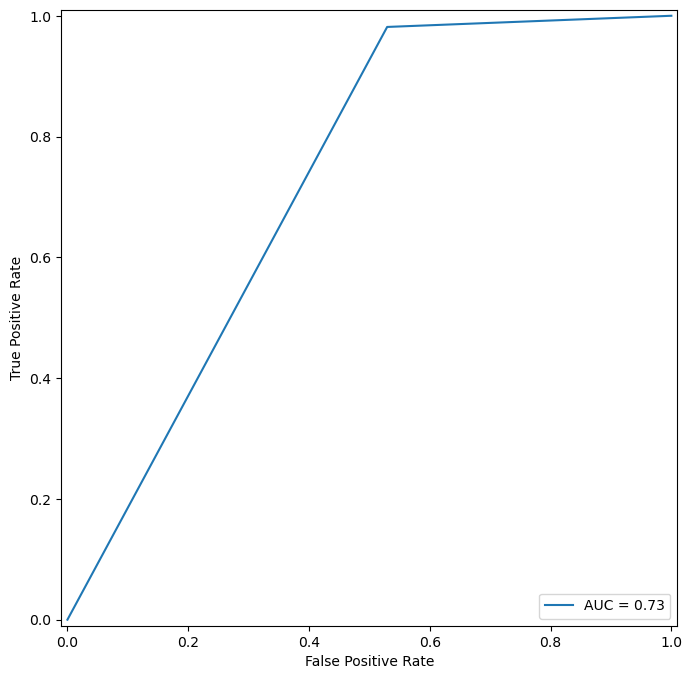

In [56]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

fpr,tpr, threshold = roc_curve(y_test,ypred_test)
roc_auc = auc(fpr,tpr)
RocCurveDisplay(fpr = fpr,tpr = tpr,roc_auc = roc_auc).plot()
plt.show()

In [57]:
# AUC Score
from sklearn.metrics import roc_auc_score
print ('AUC Score :',roc_auc_score(y_test,ypred_test))

AUC Score : 0.7260348583877996


## KNN

In [58]:
# Hyperparameter tunning
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1,50)) ,'p':[1,2]}
knn_grid = GridSearchCV(estimator, param_grid,scoring='accuracy',cv=5)
knn_grid.fit(X_train,y_train)

# KNN with best Hyperparameter
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=8, p=1)

In [60]:
# Modeling
knn_model = knn_grid.best_estimator_
knn_model.fit(X_train,y_train)

#predict and evaluate on Train data
ypred_train = knn_model.predict(X_train)
print('Train accuracy ',accuracy_score(y_train,ypred_train))

#cross validation on Train data
print('CV score ',cross_val_score(knn_model,X_train,y_train,cv=5,scoring="accuracy").mean())

#predict & evaluate on test data
ypred_test = knn_model.predict(X_test)
print('Test Accuracy :',accuracy_score(y_test,ypred_test))

Train accuracy  0.7837837837837838
CV score  0.7594594594594594
Test Accuracy : 0.7672955974842768


## Support vector machine 

In [61]:
# hyperparameter tunning
from sklearn.svm import SVC
estimator = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf','sigmoid','poly']}
svm_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
svm_grid.fit(X_train,y_train)

# SVM with best Hyperparameters
svm_grid.best_estimator_

SVC(C=0.1, kernel='linear')

In [62]:
# Modeling
svm_model = svm_grid.best_estimator_
svm_model.fit(X_train,y_train)

#predict and evaluate on Train data
ypred_train = svm_model.predict(X_train)
print("Tran accuracy ",accuracy_score(y_train,ypred_train))

#cross validation on Train data
print('CV score',cross_val_score(svm_model,X_train,y_train,cv=5,scoring='accuracy').mean())

#predict and evaluate on Test data
ypred_test = svm_model.predict(X_test)
print('Test accuracy',accuracy_score(y_test,ypred_test))

Tran accuracy  0.8135135135135135
CV score 0.8135135135135135
Test accuracy 0.8176100628930818


## Decision Tree Classifier

In [63]:
model = DecisionTreeClassifier(random_state=True)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=True)

In [ ]:
from skleaarn.tree import